In [1]:
%matplotlib inline

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pandas as pd

print('Generating rows to skip')
s = 10000  # desired sample size
n = 5967780
path = '../../data/2001/2001.csv'
rows_to_skip = sorted(np.random.choice(np.arange(1, n + 1), (n - s), replace=False))
print('Rows to skip: ', len(rows_to_skip))
print('Loading data')
# http://pandas.pydata.org/pandas-docs/stable/io.html#date-handling
df = pd.read_csv(path,
                 encoding='iso-8859-1', engine='c',
                 skiprows=rows_to_skip,
                 parse_dates=[['Year', 'Month', 'DayofMonth']]
                )
print('Data loaded')

Generating rows to skip
Rows to skip:  5957780
Loading data
Data loaded


In [3]:
!wc -l ../../data/2001/2001.csv

 5967781 ../../data/2001/2001.csv


In [4]:
df.count()

Year_Month_DayofMonth    10000
DayOfWeek                10000
DepTime                   9603
CRSDepTime               10000
ArrTime                   9578
CRSArrTime               10000
UniqueCarrier            10000
FlightNum                10000
TailNum                  10000
ActualElapsedTime         9578
CRSElapsedTime           10000
AirTime                   9578
ArrDelay                  9578
DepDelay                  9603
Origin                   10000
Dest                     10000
Distance                 10000
TaxiIn                   10000
TaxiOut                  10000
Cancelled                10000
CancellationCode             0
Diverted                 10000
CarrierDelay                 0
WeatherDelay                 0
NASDelay                     0
SecurityDelay                0
LateAircraftDelay            0
dtype: int64

In [5]:
df.index = pd.to_datetime(df.pop('Year_Month_DayofMonth'))

In [6]:
df.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year_Month_DayofMonth,,,,,,,,,,,,,,,,,,,,,
2001-01-13,6,935.0,940,1042.0,1054,US,376,N339äâ,67.0,74,...,3,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2001-01-26,5,2124.0,2107,2230.0,2229,US,389,N392äâ,66.0,82,...,7,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2001-01-30,2,654.0,700,824.0,814,US,401,N628Aä,90.0,74,...,6,21,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2001-01-30,2,1042.0,1045,1133.0,1136,US,428,N335äâ,51.0,51,...,6,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2001-01-23,2,1325.0,1325,1426.0,1443,US,443,N443äâ,61.0,78,...,3,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.Cancelled['2001-09-10'].mean()

0.03125

In [8]:
df.Cancelled['2001-09-11'].mean()

0.8148148148148148

In [9]:
df.Cancelled['2001-09-12'].mean()

1.0

In [10]:
df.Cancelled['2001-09-13'].mean()

0.8181818181818182

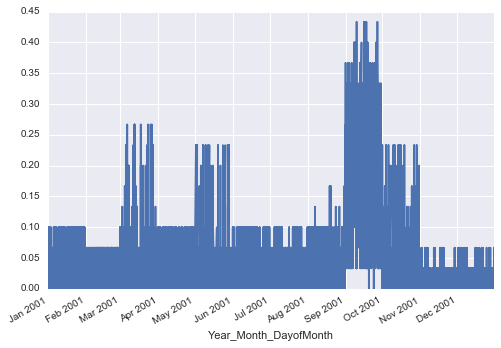

In [11]:
rolling = df.Cancelled.rolling(window=30,center=False).mean()
complete = rolling.dropna()
complete.plot()
# resampled = complete.resample('d').mean()
# resampled
# resampled.plot()
# rolling.plot()

In [12]:
grouped = df.groupby(df.UniqueCarrier)
means = grouped.mean()[['DepDelay', 'ArrDelay']]
means

,DepDelay,ArrDelay
UniqueCarrier,,
AA,8.486173,4.879464
AQ,4.920000,6.400000
AS,15.225410,15.688797
CO,5.186007,1.697952
DL,6.858382,4.526812
HP,12.002890,11.742029
MQ,10.392405,7.903955
NW,5.735605,2.248235
TW,3.640964,1.668281


Populating the interactive namespace from numpy and matplotlib


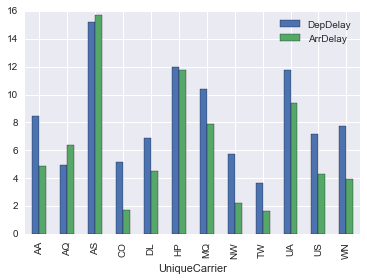

In [13]:
# http://pandas.pydata.org/pandas-docs/stable/visualization.html
%pylab inline
import matplotlib
# matplotlib.style.use('ggplot')
# means.plot(kind='barh')
# means.plot(kind='bar')
# means.plot.bar(stacked=True)
means.plot.bar()


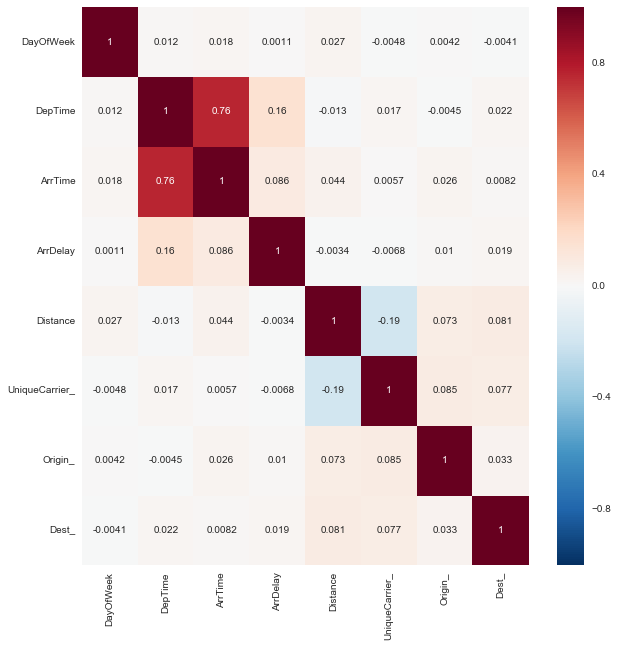

In [14]:
text_cols = [u'UniqueCarrier' , u'Origin', u'Dest']
le = preprocessing.LabelEncoder()
for c in text_cols:
    # print (c,set(df[c].values))
    flist = list(set(df[c].values))
    # print(flist)
    le.fit(flist)
    leo = le.transform(flist)
    # print (c,flist,leo)
    df[c+'_'] = df[c]
    df[c+'_'].replace(flist,value=leo,inplace=True)

df.fillna(-1, inplace=True)

cols_for_correlation = [
    u'DayOfWeek',
    u'DepTime',
    u'ArrTime',
    u'ArrDelay',
    u'Distance',
    u'UniqueCarrier_',
    u'Origin_',
    u'Dest_'
]
plt.clf()
corrmat = df[cols_for_correlation].corr()
sns.heatmap(corrmat, annot=True)
figure = plt.gcf()
figure.set_size_inches(10, 10)
plt.show()

In [15]:
def plot(col1, col2):
    plt.clf()
    # https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
    sns.jointplot(df[col1],df[col2],dropna=True, kind="hex")
    figure = plt.gcf()
    figure.set_size_inches(10, 10)
    plt.show()

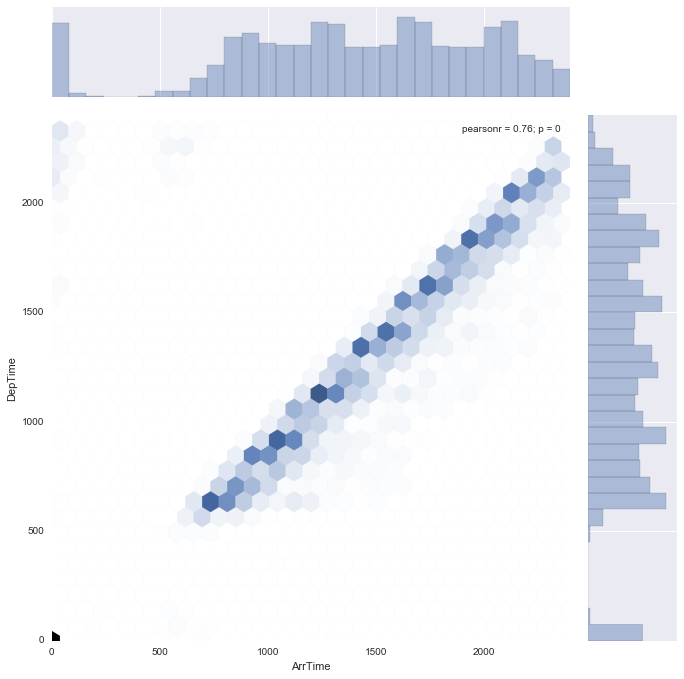

In [16]:
plot('ArrTime', 'DepTime')

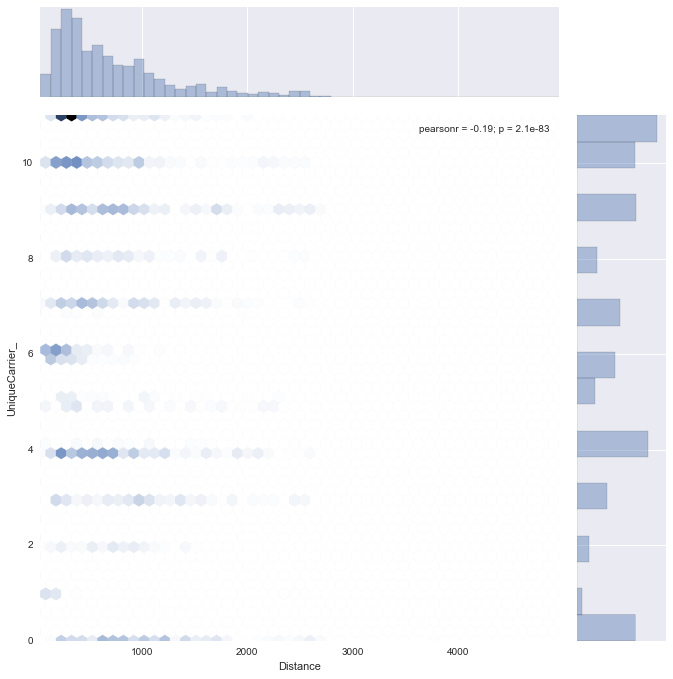

In [17]:
plot('Distance', 'UniqueCarrier_')

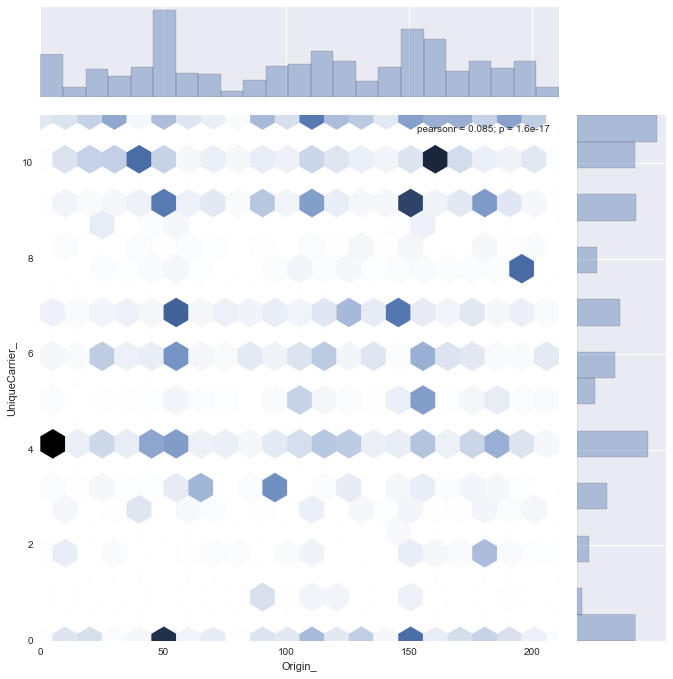

In [18]:
plot('Origin_', 'UniqueCarrier_')